In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
plt.style.use('ggplot')

In [7]:
df = pd.read_excel('./2221 final (2).xlsx')
df.head()

Timestamp (YYYY-MM-DDThh:mm:ss)  Glucose Value (mg/dL) food consumed
0             2023-09-27T13:42:31                    151           NaN
1             2023-09-27T13:47:31                    153           NaN
2             2023-09-27T13:52:31                    156           NaN
3             2023-09-27T13:57:31                    160           NaN
4             2023-09-27T14:02:31                    164           NaN

In [8]:
glucose = df['Glucose Value (mg/dL)'].values
timestamp = df['Timestamp (YYYY-MM-DDThh:mm:ss)'].values
# partitions = np.linspace(0, len(df), 4).astype(np.int32)
partitions = [0, 3400, 6800]
food_timesteps = df['food consumed']
food_timesteps = food_timesteps[~pd.isna(food_timesteps)].index

df1, df2 = df[partitions[0]:partitions[1]], df[partitions[1]:partitions[2]]
df.shape

(6806, 3)

In [9]:
dataset = {}

In [10]:
glucose = df1['Glucose Value (mg/dL)'].values
food_consumed = df1['food consumed'].fillna(0).values
food_timesteps1 = df1['food consumed']
food_timesteps1 = food_timesteps1[~pd.isna(food_timesteps1)].index

# Create dictionaries for red and green foods
red_foods = {}
green_foods = {}

# Classify foods based on glucose levels
for i, timestep in enumerate(food_timesteps1):
    if glucose[timestep] > 140:
        red_foods[i] = food_consumed[timestep]
    else:
        green_foods[i] = food_consumed[timestep]

# Plot the glucose levels with meal markers
plt.figure(figsize=(30, 5))
plt.plot(glucose, label="Glucose Levels")
for i in food_timesteps1:
    plt.axvline(i, color='r' if glucose[i] > 140 else 'g', linestyle='--', alpha=0.4,
                label="Red Food" if glucose[i] > 140 else "Green Food" if i == food_timesteps1[0] else "")
plt.axhline(140, color='g', linestyle='--', alpha=0.5, label="Threshold (140 mg/dL)")
plt.xticks(food_timesteps1, np.arange(len(food_timesteps1)), rotation=45)
plt.legend()
plt.title("Glucose Levels and Food Events")
plt.xlabel("Index")
plt.ylabel("Glucose Level (mg/dL)")
plt.show()

# Print red and green foods
print("Red Foods (Glucose > 140):")
for idx, food in red_foods.items():
    print(f"{idx} : {food}")

print("\nGreen Foods (Glucose <= 140):")
for idx, food in green_foods.items():
    print(f"{idx} : {food}")


In [11]:
food_timesteps1_new = np.insert(food_timesteps1, len(food_timesteps1), len(glucose) - 1)
food_timesteps1_diff = np.diff(food_timesteps1_new)
scores1 = []
for i in range(0, len(food_timesteps1_diff)):
    scores1.append(np.mean(np.abs(glucose[food_timesteps1_new[i]:food_timesteps1_new[i+1]] - 140)))

for i, timestep in enumerate(food_timesteps1):
    if food_consumed[timestep] not in dataset.keys():
        dataset[food_consumed[timestep]] = [scores1[i]]
    else:
        dataset[food_consumed[timestep]].append(scores1[i])

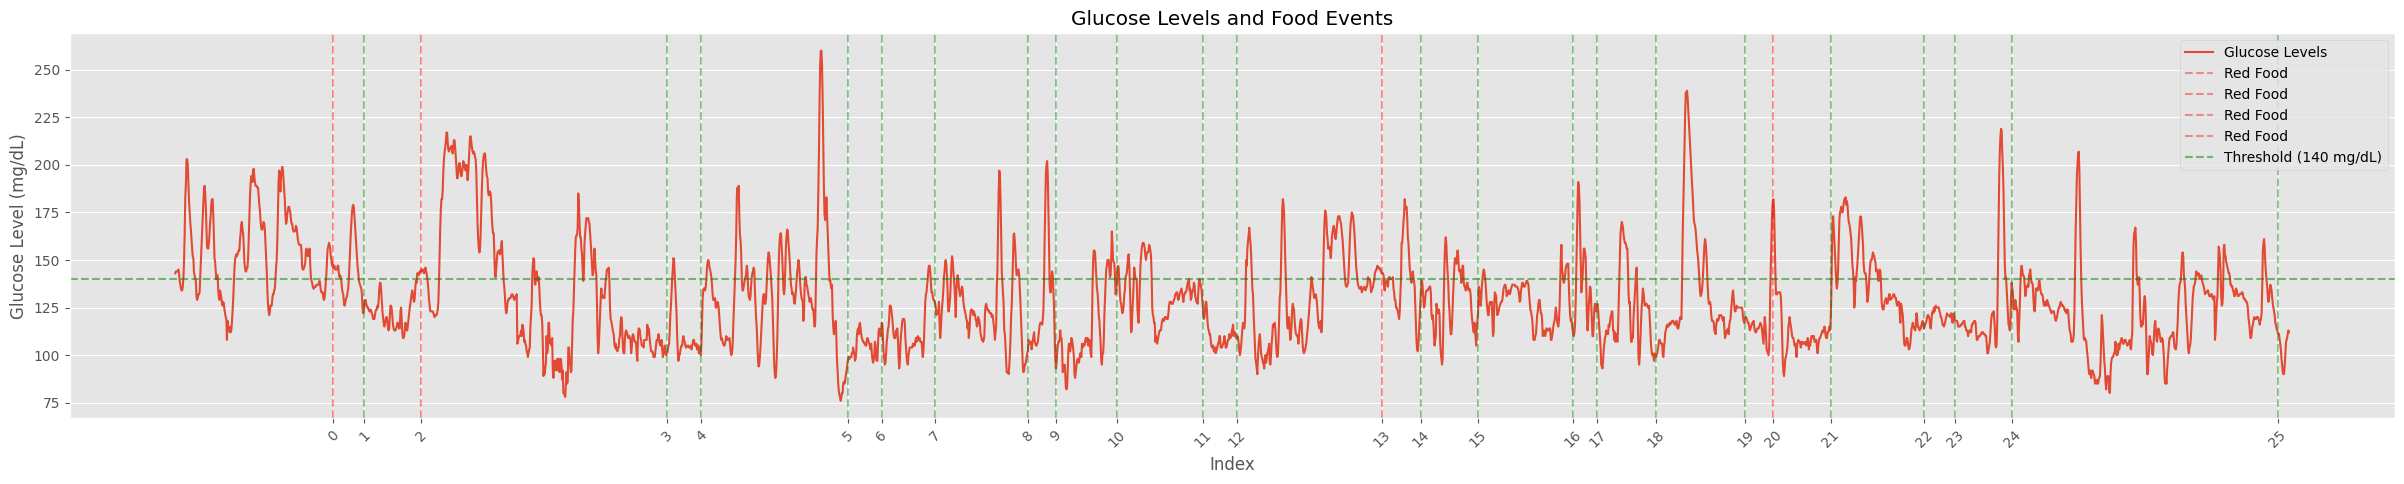

Red Foods (Glucose > 140):
0 : coffee, yogurt
2 : sandwich, bread
13 : coffee
20 : beans, bread

Green Foods (Glucose <= 140):
1 : chicken, water
3 : yogurt
4 : pasta, tomato sauce, chicken
5 : coffee, bread
6 : chicken, rice
7 : french baguette, sour cream, coffee
8 : coffee, bread
9 : rice, beef
10 : chicken wings, coke
11 : coffee 
12 : fried beans, eggs, coffee
14 : pepperoni pizza
15 : pepperoni pizza
16 : coffee
17 : fried beans, cheese
18 : french baguette, sour cream
19 : corn, milk
21 : vegetables
22 : coffee
23 : rice, chicken
24 : chicken, tomato, coffee
25 : coffee


In [13]:
glucose = df2['Glucose Value (mg/dL)'].values
food_consumed = df2['food consumed'].fillna(0).values
food_timesteps2 = df2['food consumed']
food_timesteps2 = food_timesteps2[~pd.isna(food_timesteps2)].index

# Adjust food_timesteps2 to be relative to df2
food_timesteps2 = food_timesteps2 - partitions[1]
#This line adjusts the food_timesteps2 to be relative to the start of df2.
#partitions[1] is the starting index of df2 in the original df.

#We subtract partitions[1] from each index in food_timesteps2
#to get the correct index within df2.

# Create dictionaries for red and green foods
red_foods = {}
green_foods = {}

# Classify foods based on glucose levels
for i, timestep in enumerate(food_timesteps2):
    if glucose[timestep] > 140:
        red_foods[i] = food_consumed[timestep]
    else:
        green_foods[i] = food_consumed[timestep]

# Plot the glucose levels with meal markers
plt.figure(figsize=(30, 5))
plt.plot(glucose, label="Glucose Levels")
for i in food_timesteps2:
    plt.axvline(i, color='r' if glucose[i] > 140 else 'g', linestyle='--', alpha=0.4,
                label="Red Food" if glucose[i] > 140 else "Green Food" if i == food_timesteps2[0] else "")
plt.axhline(140, color='g', linestyle='--', alpha=0.5, label="Threshold (140 mg/dL)")
plt.xticks(food_timesteps2, np.arange(len(food_timesteps2)), rotation=45)
plt.legend()
plt.title("Glucose Levels and Food Events")
plt.xlabel("Index")
plt.ylabel("Glucose Level (mg/dL)")
plt.show()

# Print red and green foods
print("Red Foods (Glucose > 140):")
for idx, food in red_foods.items():
    print(f"{idx} : {food}")

print("\nGreen Foods (Glucose <= 140):")
for idx, food in green_foods.items():
    print(f"{idx} : {food}")

In [17]:
food_timesteps2_new = np.insert(food_timesteps2,  len(food_timesteps2), len(glucose) - 1)
food_timesteps2_diff = np.diff(food_timesteps2_new)
scores2 = []
for i in range(0, len(food_timesteps2_diff)):
    scores2.append(np.mean(np.abs(glucose[food_timesteps2_new[i]:food_timesteps2_new[i+1]] - 140)))

for i, timestep in enumerate(food_timesteps2):
    if food_consumed[timestep] not in dataset.keys():
        dataset[food_consumed[timestep]] = [scores2[i]]
    else:
        dataset[food_consumed[timestep]].append(scores2[i])

In [18]:
dataset_final = {}

for k, v in dataset.items():
    score = np.mean(v)
    if score != 0:
        dataset_final[k] = np.mean(v)

dataset_final

{'fried beans, eggs, coffee': 21.321652421652423,
 'coffee': 25.898607782898104,
 'rice, chicken': 26.76950127877238,
 'coffee, cookies': 21.49404761904762,
 'french fries, burger, coke': 24.367816091954023,
 'chicken, coke': 24.22875816993464,
 'fried beans, coffee, bread': 16.47826086956522,
 'chicken, salad': 25.285714285714285,
 'popcorn, coke': 21.071428571428573,
 'cheese, pepporoni': 16.225555555555555,
 'fried beans, eggs': 12.984848484848484,
 'coffee, bread': 22.522494553376905,
 'french baguette': 16.85251798561151,
 'peperoni, coke': 18.30666666666667,
 'tortillas, eggs': 15.855072463768115,
 'tofu, chicken': 24.166666666666668,
 'coke': 19.5,
 'broccoli, carrots': 13.67674418604651,
 'spaghetti, broccoli, carrots, sour cream': 23.5,
 'beef': 24.047619047619047,
 'chicken wings, coke': 12.909592326139089,
 'coffee ': 28.72866344605475,
 'coffee, eggs': 25.02777777777778,
 'chicken, rice': 19.575476070104482,
 'coffee, yogurt': 11.66,
 'chicken, water': 17.076923076923077,
 

In [19]:
X, y = [], []

def clean(text):
    import re
    return re.sub(r'[^\w\s]', '', text).strip().lower()

for k, v in dataset_final.items():
    # food = " ".join([clean(food).strip() for food in k.split(',')])
    # X.append([f for f in food.split(' ')])
    X.append(' '.join(clean(k).split()))
    y.append(v)

X


['fried beans eggs coffee',
 'coffee',
 'rice chicken',
 'coffee cookies',
 'french fries burger coke',
 'chicken coke',
 'fried beans coffee bread',
 'chicken salad',
 'popcorn coke',
 'cheese pepporoni',
 'fried beans eggs',
 'coffee bread',
 'french baguette',
 'peperoni coke',
 'tortillas eggs',
 'tofu chicken',
 'coke',
 'broccoli carrots',
 'spaghetti broccoli carrots sour cream',
 'beef',
 'chicken wings coke',
 'coffee',
 'coffee eggs',
 'chicken rice',
 'coffee yogurt',
 'chicken water',
 'sandwich bread',
 'yogurt',
 'pasta tomato sauce chicken',
 'french baguette sour cream coffee',
 'rice beef',
 'pepperoni pizza',
 'fried beans cheese',
 'french baguette sour cream',
 'corn milk',
 'beans bread',
 'vegetables',
 'chicken tomato coffee']

In [20]:
# TF-IDF on the X: used to convert text data into numerical data based on term frequencey and inverse document frequency
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X).toarray()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


y_scaled = StandardScaler().fit_transform(np.array(y).reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_scaled, test_size=0.2, random_state=42)

random_forest = RandomForestRegressor(n_estimators=50, random_state=42)
gboosting = GradientBoostingRegressor(n_estimators=50, random_state=42)
linear_reg = LinearRegression()
svr = SVR(kernel='poly', degree=3)

models = {
    'Random Forest': random_forest,
    'Support Vector Regression': svr,
    'Linear Regression': linear_reg
}

for model in models:
    models[model].fit(X_train, y_train)
    pred = models[model].predict(X_test)
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print(f"{model} : mse={mse:.3f}, r2={r2:.2f}")


Random Forest : mse=1.972, r2=-0.70
Support Vector Regression : mse=2.183, r2=-0.88
Linear Regression : mse=9.414, r2=-7.10
